In [11]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.interpolate import RegularGridInterpolator
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from scipy import stats

import torch as th
import torch.nn.functional as Func
from torchvision.transforms import Resize


from generate_grf_scalar_spectral import RandomFieldGenerator2D


In [12]:
generator = RandomFieldGenerator2D(nx=64, ny=64)

In [13]:
fine_fields = np.load(
    "/data1/jy384/research/Data/MultiscaleBridge/fine_grf_10000_res64.npy"
)
coarse_fields = np.load(
    "/data1/jy384/research/Data/MultiscaleBridge/coarse_grf_10000_res16.npy"
)

H = 12

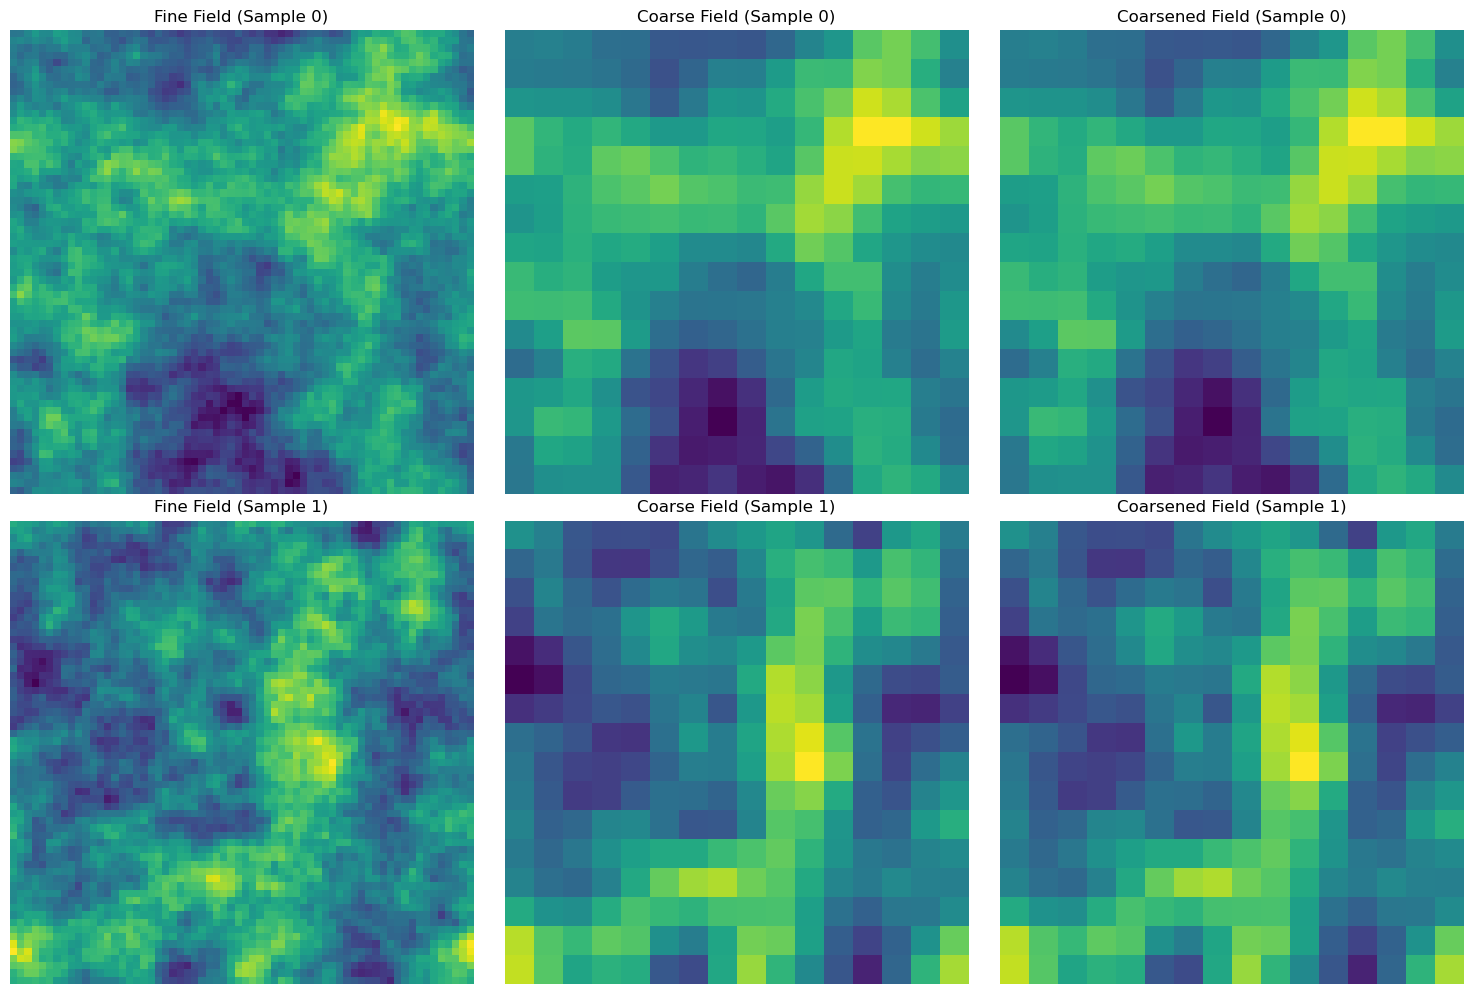

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# For Sample 0:
axes[0, 0].imshow(fine_fields[0], cmap="viridis")
axes[0, 0].set_title("Fine Field (Sample 0)")
axes[0, 0].axis("off")

axes[0, 1].imshow(coarse_fields[0], cmap="viridis")
axes[0, 1].set_title("Coarse Field (Sample 0)")
axes[0, 1].axis("off")

# Compute the coarsened field from the fine field.
coarsened_field0 = (
    generator.coarsen_field(fine_fields[0], H=H, downsample_factor=4).numpy().squeeze()
)
axes[0, 2].imshow(coarsened_field0, cmap="viridis")
axes[0, 2].set_title("Coarsened Field (Sample 0)")
axes[0, 2].axis("off")

# For Sample 1:
axes[1, 0].imshow(fine_fields[1], cmap="viridis")
axes[1, 0].set_title("Fine Field (Sample 1)")
axes[1, 0].axis("off")

axes[1, 1].imshow(coarse_fields[1], cmap="viridis")
axes[1, 1].set_title("Coarse Field (Sample 1)")
axes[1, 1].axis("off")

coarsened_field1 = (
    generator.coarsen_field(fine_fields[1], H=H, downsample_factor=4).numpy().squeeze()
)
axes[1, 2].imshow(coarsened_field1, cmap="viridis")
axes[1, 2].set_title("Coarsened Field (Sample 1)")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


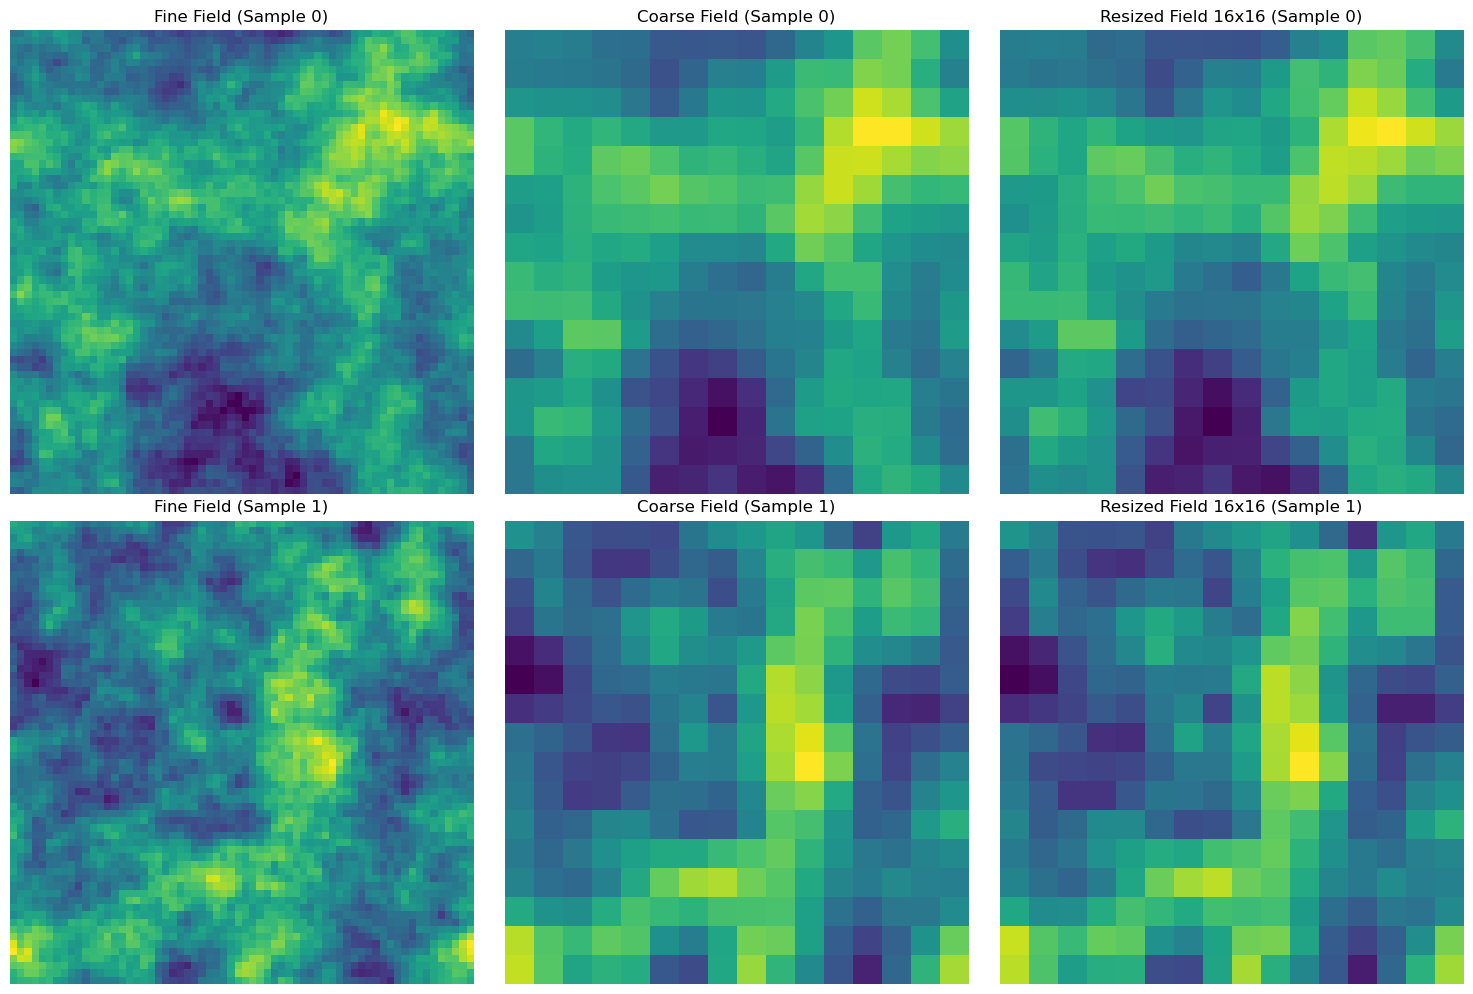

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# For Sample 0:
axes[0, 0].imshow(fine_fields[0], cmap="viridis")
axes[0, 0].set_title("Fine Field (Sample 0)")
axes[0, 0].axis("off")

axes[0, 1].imshow(coarse_fields[0], cmap="viridis")
axes[0, 1].set_title("Coarse Field (Sample 0)")
axes[0, 1].axis("off")

# Compute the coarsened field from the fine field.
resized_field0 = Resize(16)(th.from_numpy(fine_fields[0]).unsqueeze(0))
axes[0, 2].imshow(resized_field0.numpy().squeeze(), cmap="viridis")
axes[0, 2].set_title("Resized Field 16x16 (Sample 0)")
axes[0, 2].axis("off")

# For Sample 1:
axes[1, 0].imshow(fine_fields[1], cmap="viridis")
axes[1, 0].set_title("Fine Field (Sample 1)")
axes[1, 0].axis("off")

axes[1, 1].imshow(coarse_fields[1], cmap="viridis")
axes[1, 1].set_title("Coarse Field (Sample 1)")
axes[1, 1].axis("off")

resized_field1 = Resize(16)(th.from_numpy(fine_fields[1]).unsqueeze(0))
axes[1, 2].imshow(resized_field1.numpy().squeeze(), cmap="viridis")
axes[1, 2].set_title("Resized Field 16x16 (Sample 1)")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


In [16]:
def upsample(field, nx, ny, method='bicubic'):
    if isinstance(field, np.ndarray):
        field = th.from_numpy(field)
        # add a channel dimension
        field = field.unsqueeze(0)

    if method == 'nearest':
        field = Func.interpolate(
            field.unsqueeze(0), size=(nx, ny), mode=method, 
        ).squeeze(0)
    else:
        field = Func.interpolate(
            field.unsqueeze(0), size=(nx, ny), mode=method, align_corners=False
        ).squeeze(0)
    return field

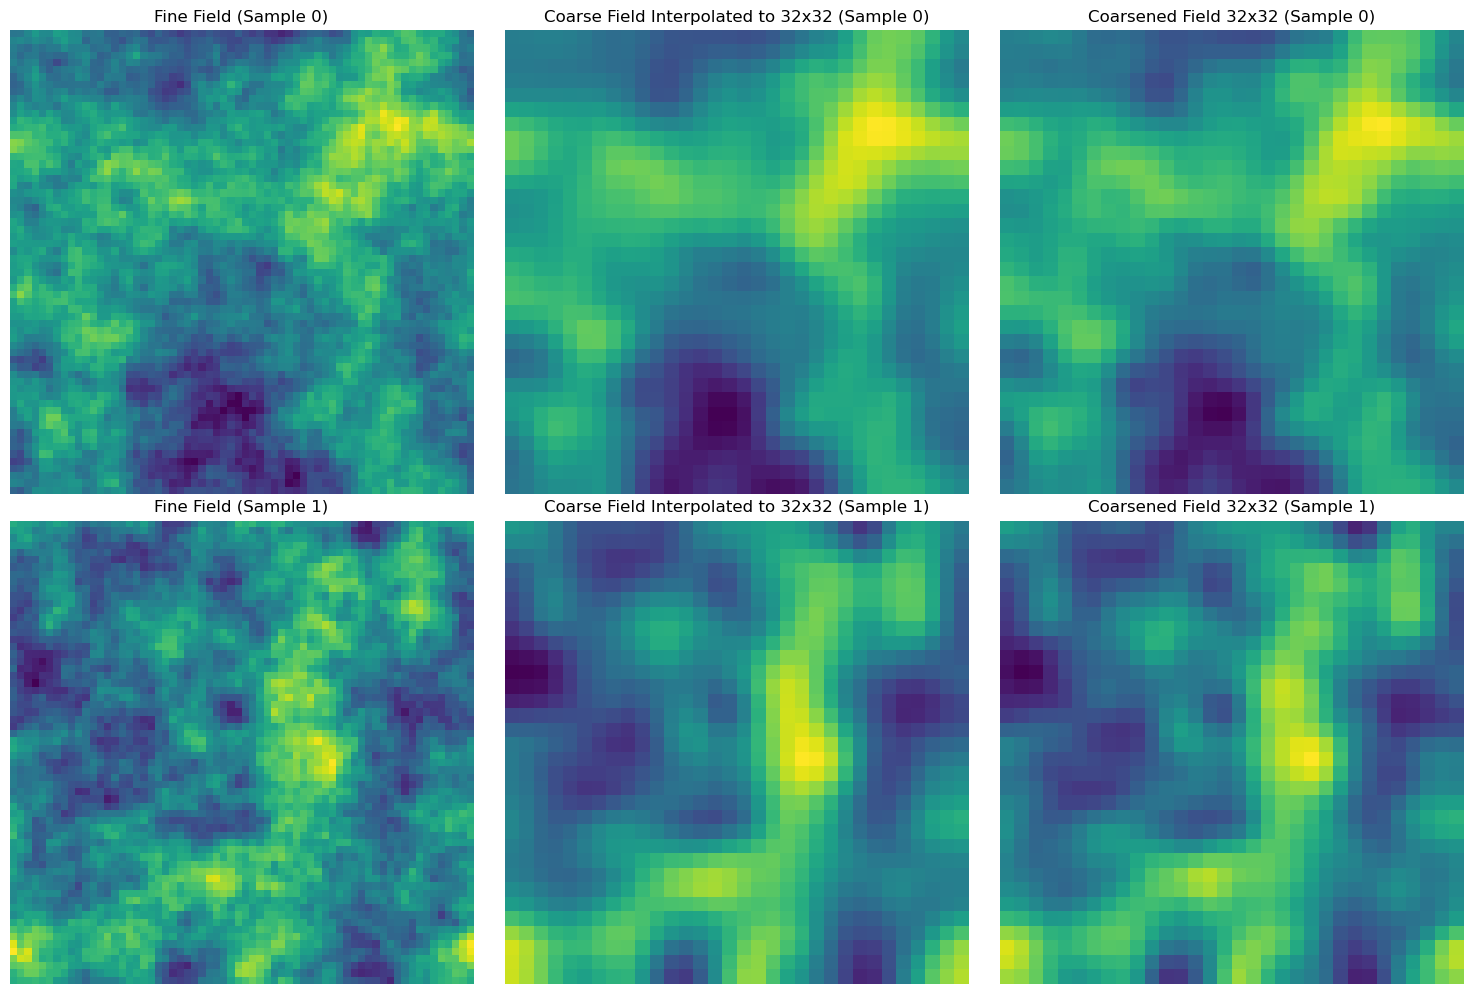

In [17]:
method = 'bicubic'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# For Sample 0:
axes[0, 0].imshow(fine_fields[0], cmap="viridis")
axes[0, 0].set_title("Fine Field (Sample 0)")
axes[0, 0].axis("off")

axes[0, 1].imshow(upsample(coarse_fields[0], 32, 32, method=method).numpy().squeeze(), cmap="viridis")
axes[0, 1].set_title("Coarse Field Interpolated to 32x32 (Sample 0)")
axes[0, 1].axis("off")

# Compute the coarsened field from the fine field.
coarsened_field0 = (
    generator.coarsen_field(fine_fields[0], H=H, downsample_factor=2, method=method).numpy().squeeze()
)
axes[0, 2].imshow(coarsened_field0, cmap="viridis")
axes[0, 2].set_title("Coarsened Field 32x32 (Sample 0)")
axes[0, 2].axis("off")

# For Sample 1:
axes[1, 0].imshow(fine_fields[1], cmap="viridis")
axes[1, 0].set_title("Fine Field (Sample 1)")
axes[1, 0].axis("off")

axes[1, 1].imshow(upsample(coarse_fields[1], 32, 32, method=method).numpy().squeeze(), cmap="viridis")
axes[1, 1].set_title("Coarse Field Interpolated to 32x32 (Sample 1)")
axes[1, 1].axis("off")

coarsened_field1 = (
    generator.coarsen_field(fine_fields[1], H=H, downsample_factor=2, method=method).numpy().squeeze()
)
axes[1, 2].imshow(coarsened_field1, cmap="viridis")
axes[1, 2].set_title("Coarsened Field 32x32 (Sample 1)")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


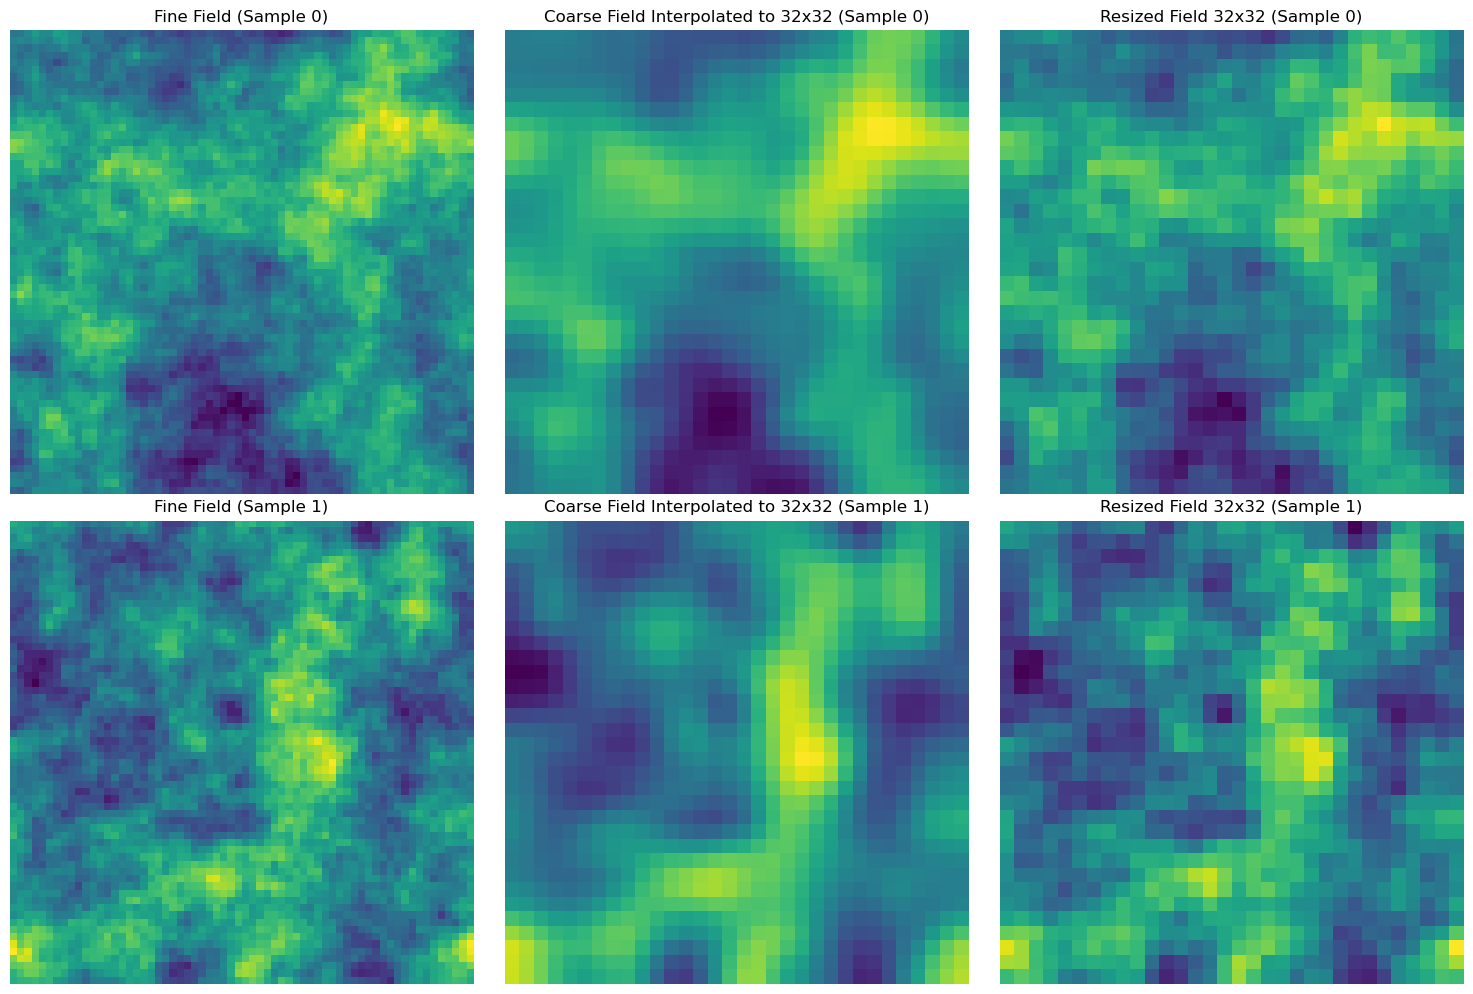

In [18]:
from torchvision.transforms import InterpolationMode
method = 'bicubic'
resize_method = InterpolationMode.BICUBIC

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# For Sample 0:
axes[0, 0].imshow(fine_fields[0], cmap="viridis")
axes[0, 0].set_title("Fine Field (Sample 0)")
axes[0, 0].axis("off")

axes[0, 1].imshow(upsample(coarse_fields[0], 32, 32, method=method).numpy().squeeze(), cmap="viridis")
axes[0, 1].set_title("Coarse Field Interpolated to 32x32 (Sample 0)")
axes[0, 1].axis("off")

# Compute the coarsened field from the fine field.
resized_field0 = Resize(32, interpolation=resize_method)(th.from_numpy(fine_fields[0]).unsqueeze(0))
axes[0, 2].imshow(resized_field0.numpy().squeeze(), cmap="viridis")
axes[0, 2].set_title("Resized Field 32x32 (Sample 0)")
axes[0, 2].axis("off")

# For Sample 1:
axes[1, 0].imshow(fine_fields[1], cmap="viridis")
axes[1, 0].set_title("Fine Field (Sample 1)")
axes[1, 0].axis("off")

axes[1, 1].imshow(upsample(coarse_fields[1], 32, 32, method=method).numpy().squeeze(), cmap="viridis")
axes[1, 1].set_title("Coarse Field Interpolated to 32x32 (Sample 1)")
axes[1, 1].axis("off")

resized_field1 = Resize(32, interpolation=resize_method)(th.from_numpy(fine_fields[1]).unsqueeze(0))
axes[1, 2].imshow(resized_field1.numpy().squeeze(), cmap="viridis")
axes[1, 2].set_title("Resized Field 32x32 (Sample 1)")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


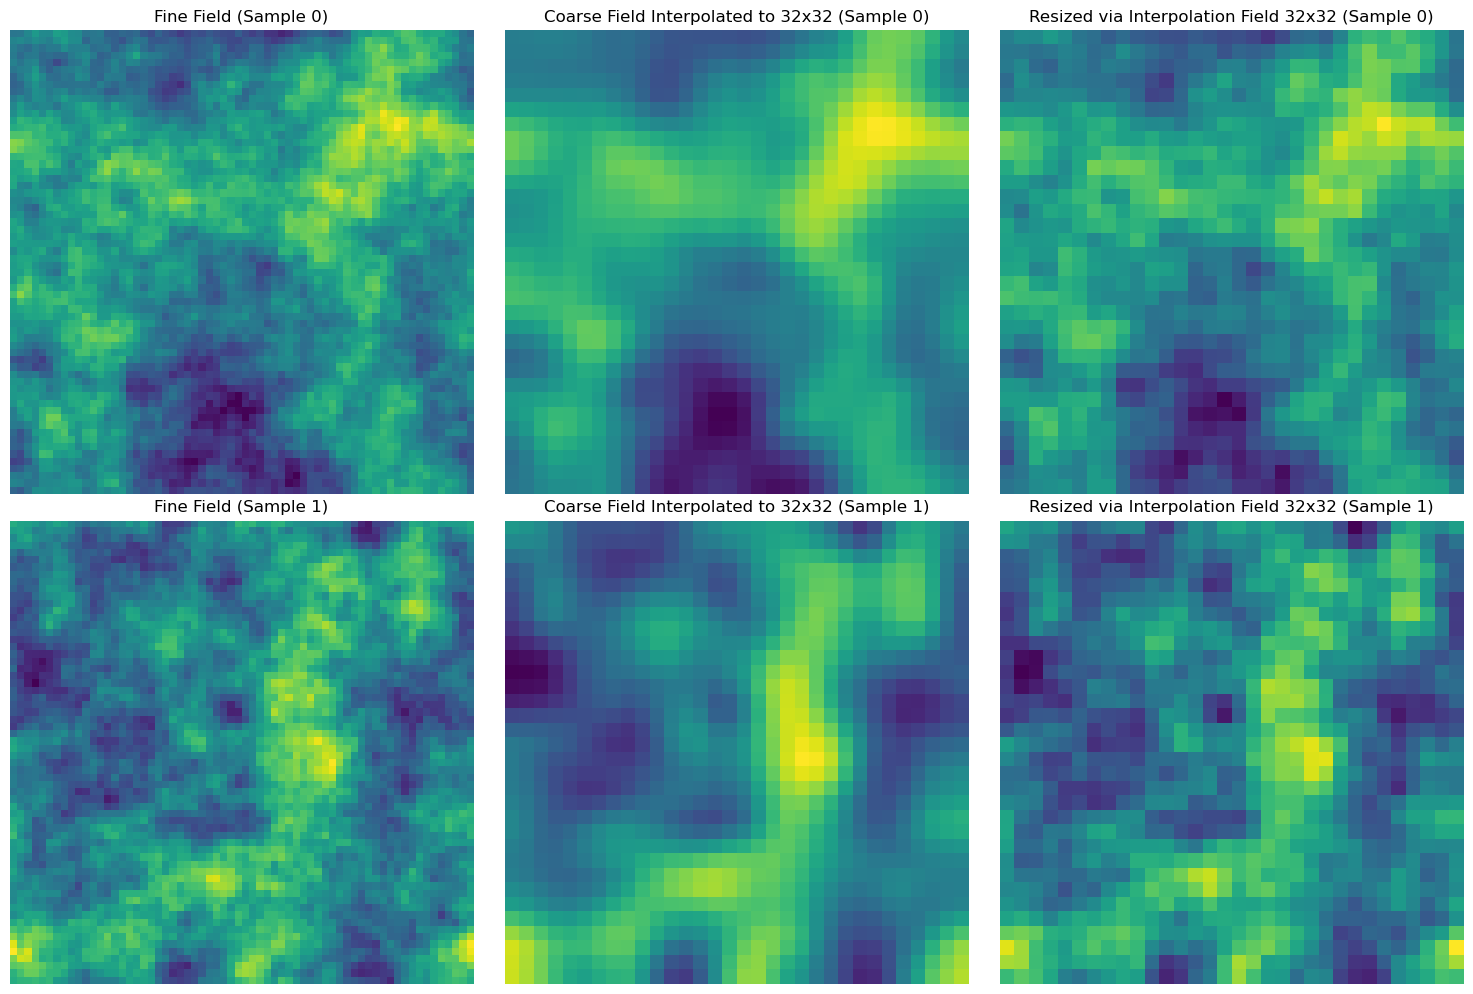

In [19]:
from torchvision.transforms import Resize

method = 'bicubic'

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# For Sample 0:
axes[0, 0].imshow(fine_fields[0], cmap="viridis")
axes[0, 0].set_title("Fine Field (Sample 0)")
axes[0, 0].axis("off")

axes[0, 1].imshow(upsample(coarse_fields[0], 32, 32, method=method).numpy().squeeze(), cmap="viridis")
axes[0, 1].set_title("Coarse Field Interpolated to 32x32 (Sample 0)")
axes[0, 1].axis("off")

# Compute the coarsened field from the fine field.
resized_field0_interpolation = generator.coarsen_field(
    fine_fields[0], H=H, downsample_factor=2, method=method, apply_gaussian_smoothing=False, antialias=True
)
axes[0, 2].imshow(resized_field0_interpolation.numpy().squeeze(), cmap="viridis")
axes[0, 2].set_title("Resized via Interpolation Field 32x32 (Sample 0)")
axes[0, 2].axis("off")

# For Sample 1:
axes[1, 0].imshow(fine_fields[1], cmap="viridis")
axes[1, 0].set_title("Fine Field (Sample 1)")
axes[1, 0].axis("off")

axes[1, 1].imshow(upsample(coarse_fields[1], 32, 32, method=method).numpy().squeeze(), cmap="viridis")
axes[1, 1].set_title("Coarse Field Interpolated to 32x32 (Sample 1)")
axes[1, 1].axis("off")

resized_field1_interpolation = generator.coarsen_field(
    fine_fields[1], H=H, downsample_factor=2, method=method, apply_gaussian_smoothing=False, antialias=True
)
axes[1, 2].imshow(resized_field1_interpolation.numpy().squeeze(), cmap="viridis")
axes[1, 2].set_title("Resized via Interpolation Field 32x32 (Sample 1)")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


(-0.5, 63.5, 63.5, -0.5)

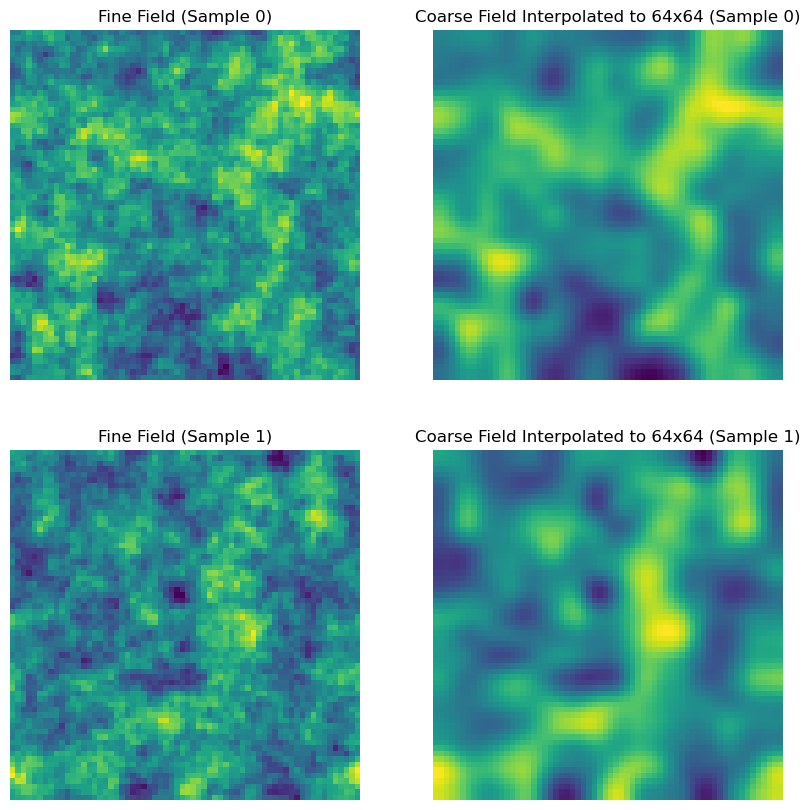

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# For Sample 0:
axes[0, 0].imshow(fine_fields[0], cmap="viridis")
axes[0, 0].set_title("Fine Field (Sample 0)")
axes[0, 0].axis("off")

axes[0, 1].imshow(upsample(coarse_fields[0], 64, 64, method=method).numpy().squeeze(), cmap="viridis")
axes[0, 1].set_title("Coarse Field Interpolated to 64x64 (Sample 0)")
axes[0, 1].axis("off")

# For Sample 1:
axes[1, 0].imshow(fine_fields[1], cmap="viridis")
axes[1, 0].set_title("Fine Field (Sample 1)")
axes[1, 0].axis("off")

axes[1, 1].imshow(upsample(coarse_fields[1], 64, 64, method=method).numpy().squeeze(), cmap="viridis")
axes[1, 1].set_title("Coarse Field Interpolated to 64x64 (Sample 1)")
axes[1, 1].axis("off")


In [ ]:
# test error after downsampling the interpolated coarse fields to 16x16
interpolated_coarse_fields = upsample(coarse_fields[0], 64, 64, method=method)
coarsened_field0_16x16 = generator.coarsen_field(
    # interpolated_coarse_fields, H=12, downsample_factor=None, apply_gaussian_smoothing=False, method=method
    interpolated_coarse_fields, H=12, size=(16, 16), method=method, apply_gaussian_smoothing=False
)
error = th.norm(th.from_numpy(coarse_fields[0]) - coarsened_field0_16x16)
print(
    f"Error between downsampled interpolated coarse field and original coarse field: {error}"
)

# normalized error
normalized_error = error / th.norm(th.from_numpy(coarse_fields[0]))
print(
    f"Normalized error between downsampled interpolated coarse field and original coarse field: {normalized_error}"
)



In [ ]:
def create_invertible_transforms(original_size, target_size, method='bicubic'):
    """
    Create more consistent upsampling and downsampling transforms.
    
    Args:
        original_size: Original field size (e.g., 16 for 16x16)
        target_size: Target field size after upsampling (e.g., 64 for 64x64)
        method: Interpolation method ('nearest', 'bilinear', 'bicubic')
        
    Returns:
        upsample_fn, downsample_fn: Functions for upsampling and downsampling
    """
    def upsample_fn(field):
        if isinstance(field, np.ndarray):
            field = th.from_numpy(field).float()
        
        # Add dimensions if needed
        if field.dim() == 2:
            field = field.unsqueeze(0).unsqueeze(0)  # [1, 1, H, W]
        elif field.dim() == 3:
            field = field.unsqueeze(0)  # [1, C, H, W]
            
        upsampled = th.nn.functional.interpolate(
            field, size=(target_size, target_size), mode=method, align_corners=False if method != 'nearest' else None
        )
        
        # Return with same dimensions as input
        if field.dim() == 4 and field.shape[0] == 1 and field.shape[1] == 1:
            return upsampled.squeeze()
        return upsampled
    
    def downsample_fn(field):
        if isinstance(field, np.ndarray):
            field = th.from_numpy(field).float()
            
        # Add dimensions if needed
        if field.dim() == 2:
            field = field.unsqueeze(0).unsqueeze(0)  # [1, 1, H, W]
        elif field.dim() == 3:
            field = field.unsqueeze(0)  # [1, C, H, W]
            
        downsampled = th.nn.functional.interpolate(
            field, size=(original_size, original_size), mode=method, align_corners=False if method != 'nearest' else None
        )
        
        # Return with same dimensions as input
        if field.dim() == 4 and field.shape[0] == 1 and field.shape[1] == 1:
            return downsampled.squeeze()
        return downsampled
    
    return upsample_fn, downsample_fn

# Create transform functions
upsample_fn, downsample_fn = create_invertible_transforms(16, 64, method='bicubic')

# Test invertibility
original_coarse = th.from_numpy(coarse_fields[0])
upsampled = upsample_fn(original_coarse)  
# upsampled = upsample(coarse_fields[0], 64, 64, method=method)
reconstructed = downsample_fn(upsampled)

# Calculate error
error = th.norm(original_coarse - reconstructed)
normalized_error = error / th.norm(original_coarse)
print(f"Normalized error: {normalized_error}")


In [ ]:
# Downsample the interpolated coarse fields to 16x16 and compute the error between the downsampled interpolated coarse field and the original coarse field
interpolated_coarse_fields = upsample(coarse_fields[0], 32, 32)
coarsened_field0_16x16 = generator.coarsen_field(
    interpolated_coarse_fields, H=1, downsample_factor=2, apply_gaussian_smoothing=False
)
error = th.norm(th.from_numpy(coarse_fields[0]) - coarsened_field0_16x16)
print(
    f"Error between downsampled interpolated coarse field and original coarse field: {error}"
)

# visualize the downsampled interpolated coarse field and the original coarse field
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(coarsened_field0_16x16.numpy().squeeze(), cmap="viridis")
axes[0].set_title("Downsampled Interpolated Coarse Field")
axes[0].axis("off")
axes[1].imshow(coarse_fields[0], cmap="viridis")
axes[1].set_title("Original Coarse Field")
axes[1].axis("off")
plt.tight_layout()

In [9]:
# Save the downsampled 32x32 intermediate field (from 64x64)
intermediate_coarse32x32_fields = np.array(
    [
        generator.coarsen_field(
            field,
            H=12,
            downsample_factor=2,
            apply_gaussian_smoothing=True,
            method="bicubic",
        )
        .numpy()
        .squeeze()
        for field in fine_fields
    ]
)

np.save("/data1/jy384/research/Data/MultiscaleBridge/coarse_intermediate_grf_10000_res32.npy", intermediate_coarse32x32_fields)
